# Small Area Income and Poverty Estimates (SAIPE): School Districts

This data is a time series, which means that we don't have to
query for a specific year like we do with survey data like the
ACS. Instead, when we download we get multiple years of data at
once.

See https://www.census.gov/data/developers/data-sets/Poverty-Statistics.html.

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(
        os.path.abspath(os.path.join(os.path.curdir, os.path.pardir, os.path.pardir))
    )
)

In [2]:
import censusdis.data as ced

from censusdis.states import STATE_NJ

In [3]:
SD_UNIFIED_EO = "04230"
SD_UNIFIED_EWR = "11340"
SD_UNIFIED_IRV = "07680"
SD_UNIFIED_MB = "10200"
SD_UNIFIED_MC = "10560"
SD_UNIFIED_OC = "12270"
SD_UNIFIED_SOMA = "15330"
SD_UNIFIED_UNT = "16500"
SD_UNIFIED_WO = "17610"

SD_UNIFIED_ALL = [
    SD_UNIFIED_EO,
    SD_UNIFIED_EWR,
    SD_UNIFIED_IRV,
    SD_UNIFIED_MB,
    SD_UNIFIED_MC,
    SD_UNIFIED_OC,
    SD_UNIFIED_SOMA,
    SD_UNIFIED_UNT,
    SD_UNIFIED_WO,
]

In [4]:
DATASET = "timeseries/poverty/saipe/schdist"

In [5]:
df_variables = ced.variables.all_variables(DATASET, "timeseries", None)

UUU timeseries/poverty/saipe/schdist timeseries


In [6]:
df_variables

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,timeseries,timeseries/poverty/saipe/schdist,N/A,GEOCAT,"Summary Level (950 Elementary, 960 Secondary, ...",NaN,"{'980': 'Administrative', '970': 'Unified', '9..."
1,timeseries,timeseries/poverty/saipe/schdist,N/A,GEOID,Combined codes for the reference geography,NaN,None
2,timeseries,timeseries/poverty/saipe/schdist,N/A,GRADE,Grade Range of District,NaN,None
3,timeseries,timeseries/poverty/saipe/schdist,N/A,LEAID,School District ID,NaN,None
4,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOV5_17RV_PT,Relevant Age 5 to 17 in Families in Poverty,NaN,{'0': 'Relevant Age 5 to 17 in Families in Pov...
5,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOV5_17V_PT,Relevant Age 5 to 17 Population,NaN,{'0': 'Relevant Age 5 to 17 Population'}
6,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOVALL_PT,Total Population,NaN,{'0': 'Total Population'}
7,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOVRAT5_17RV_PT,Relevant Age 5 to 17 Poverty Ratio Estimate,NaN,None
8,timeseries,timeseries/poverty/saipe/schdist,N/A,SD_NAME,District Name,NaN,None
9,timeseries,timeseries/poverty/saipe/schdist,N/A,STATE,State Fips Code,NaN,None


In [7]:
variables = ced.variables.group_leaves(DATASET, "timeseries", None)

variables = [v for v in variables if v != "time"]

variables

['GEOCAT',
 'GEOID',
 'GRADE',
 'LEAID',
 'SAEPOV5_17RV_PT',
 'SAEPOV5_17V_PT',
 'SAEPOVALL_PT',
 'SAEPOVRAT5_17RV_PT',
 'SD_NAME',
 'STATE',
 'YEAR']

In [8]:
df_ts = ced.download(
    DATASET,
    "timeseries",
    variables,
    state=STATE_NJ,
    school_district_unified=SD_UNIFIED_ALL,
)

df_ts[df_ts.SD_NAME.str.contains("UNION")]

,SCHOOL_DISTRICT_UNIFIED,GEOCAT,GEOID,GRADE,LEAID,SAEPOV5_17RV_PT,SAEPOV5_17V_PT,SAEPOVALL_PT,SAEPOVRAT5_17RV_PT,SD_NAME,STATE,STATE,YEAR
7,16500,970,3416500,PK-12,16500,481,6865,50327,7.0,UNION TWP,34,34,1995
16,16500,970,3416500,,16500,617,7022,50538,8.8,UNION TOWNSHIP,34,34,1997
25,16500,970,3416500,PK-12,16500,403,9125,54405,4.4,UNION TOWNSHIP,34,34,1999
34,16500,970,3416500,PK-12,16500,339,9291,54919,3.6,UNION TOWNSHIP,34,34,2000
43,16500,970,3416500,PK-12,16500,352,9381,55070,3.8,UNION TOWNSHIP,34,34,2001
52,16500,970,3416500,PK-12,16500,394,9459,55115,4.2,UNION TOWNSHIP,34,34,2002
61,16500,970,3416500,PK-12,16500,433,9537,55385,4.5,UNION TOWNSHIP,34,34,2003
70,16500,970,3416500,PK-12,16500,410,9641,55333,4.3,UNION TOWNSHIP,34,34,2004
79,16500,970,3416500,PK-12,16500,660,9424,55256,7.0,UNION TOWNSHIP,34,34,2005
88,16500,970,3416500,PK-12,16500,523,9447,55295,5.5,UNION TOWNSHIP,34,34,2006


In [9]:
df_ts["School District"] = df_ts["SCHOOL_DISTRICT_UNIFIED"].map(
    {
        district: df_district[df_district["YEAR"] == max(df_district["YEAR"])][
            "SD_NAME"
        ].iloc[0]
        for district, df_district in df_ts.groupby("SCHOOL_DISTRICT_UNIFIED")
    },
)


# for district, df_district in df_ts.groupby('SCHOOL_DISTRICT_UNIFIED'):
#    print(df_district[df_district['YEAR'] == max(df_district['YEAR'])]['SD_NAME'].iloc[0])

In [10]:
df_ts

,SCHOOL_DISTRICT_UNIFIED,GEOCAT,GEOID,GRADE,LEAID,SAEPOV5_17RV_PT,SAEPOV5_17V_PT,SAEPOVALL_PT,SAEPOVRAT5_17RV_PT,SD_NAME,STATE,STATE,YEAR,School District
0,04230,970,3404230,KG-12,04230,3898,13546,71239,28.8,EAST ORANGE,34,34,1995,East Orange City School District
1,07680,970,3407680,KG-12,07680,2401,11682,59099,20.6,IRVINGTON TOWNSHIP,34,34,1995,Irvington Township School District
2,10200,970,3410200,PK-12,10200,47,3016,18044,1.6,MILLBURN TWP,34,34,1995,Millburn Township School District
3,10560,970,3410560,PK-12,10560,409,5626,36542,7.3,MONTCLAIR TOWN,34,34,1995,Montclair Town School District
4,11340,970,3411340,PK-12,11340,24448,57748,266565,42.3,NEWARK CITY,34,34,1995,Newark City School District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,11340,970,3411340,KG-12,11340,15814,54847,308371,28.8,Newark City School District,34,34,2021,Newark City School District
221,12270,970,3412270,KG-12,12270,1347,5884,34096,22.9,Orange City Township School District,34,34,2021,Orange City Township School District
222,15330,970,3415330,KG-12,15330,331,8000,43717,4.1,South Orange-Maplewood School District,34,34,2021,South Orange-Maplewood School District
223,16500,970,3416500,KG-12,16500,678,8333,59393,8.1,Union Township School District,34,34,2021,Union Township School District


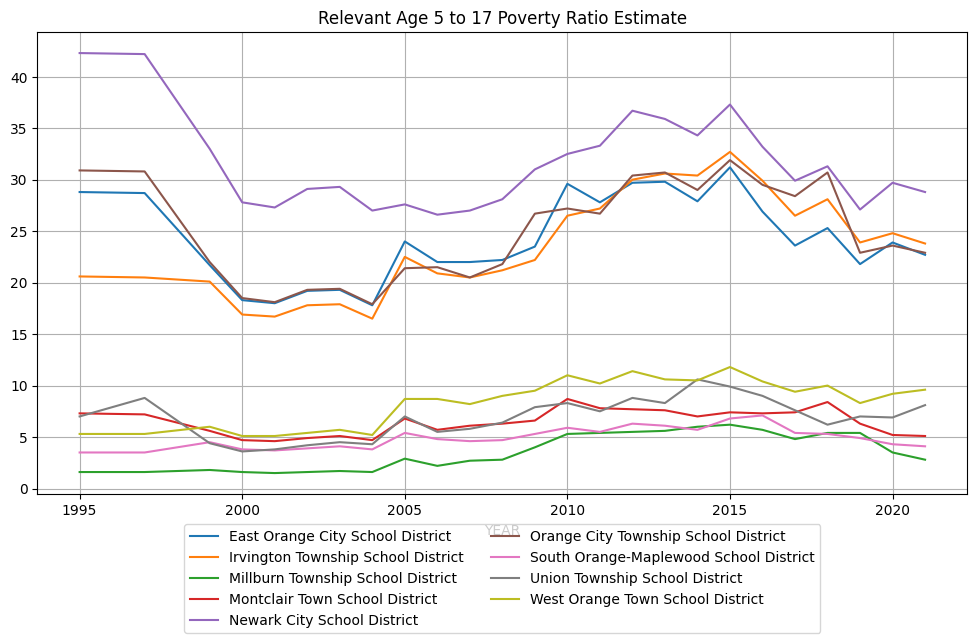

In [11]:
ax = df_ts.pivot(
    index="YEAR", columns="School District", values="SAEPOVRAT5_17RV_PT"
).plot(figsize=(12, 6))

ax.grid(True)

ax.set_title(
    df_variables[df_variables.VARIABLE == "SAEPOVRAT5_17RV_PT"]["LABEL"].iloc[0]
)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncols=2)

In [12]:
gdf_map = ced.download(
    "acs/acs5",
    2021,
    ["NAME"],
    state=STATE_NJ,
    school_district_unified=SD_UNIFIED_ALL,
    with_geometry=True,
)

UUU acs/acs5 2021


(-74.38517065, -74.09981635, 40.6606215, 40.8705785)

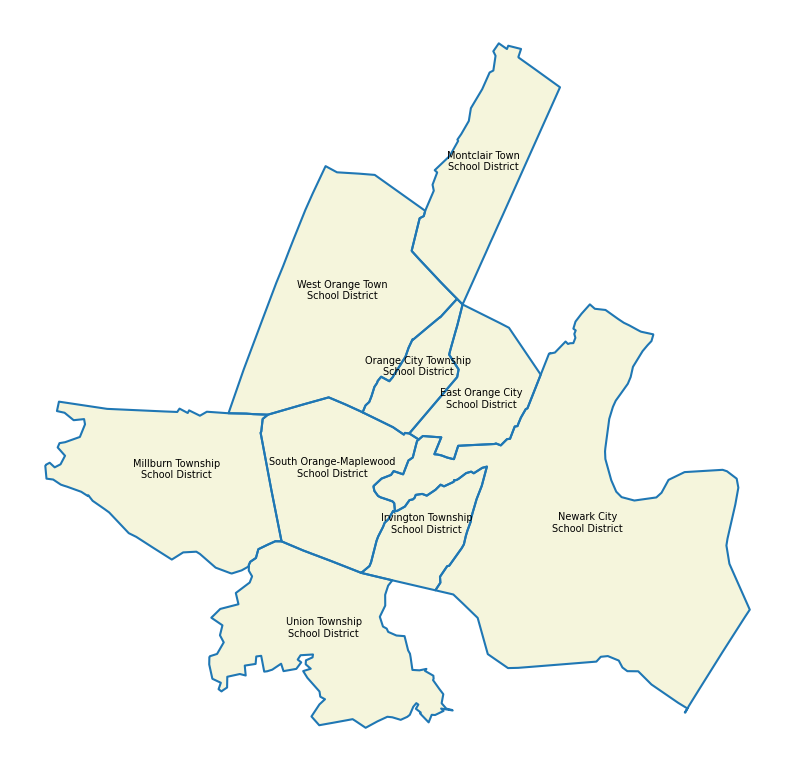

In [13]:
from adjustText import adjust_text

ax = gdf_map.plot(color="beige", figsize=(10, 10))
ax = gdf_map.boundary.plot(ax=ax)

texts = []

for _, row in gdf_map.iterrows():
    centroid = row["geometry"].centroid
    texts.append(
        ax.text(
            centroid.x,
            centroid.y,
            row["NAME"].split(",")[0].replace(" School District", "\nSchool District"),
            ha="center",
            fontsize=7,
        )
    )

adjust_text(texts, autoalign="y", force_points=(0, 0))

ax.axis("off")